In [1]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt
import tflite_runtime.interpreter as tflite


2021-11-22 08:39:38.458627: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-22 08:39:38.458665: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/aadil_jamal/.local/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:37: UserWarning: You are currently using a nightly version of TensorFlow (2.8.0-dev20211115). 
TensorFlow Addons offers no support for the nightly versions of TensorFlow. Some things might work, some other might not. 
If you encounter a bug, do not file an issue on GitHub.
  warnings.warn(


**Bit preprocessing work


from PIL import Image
import os, sys
import glob

root_dir = "./mitrdataset/"


for filename in glob.iglob(root_dir + '**/*.png', recursive=True):
    print(filename)
    im = Image.open(filename)
    imResize = im.resize((224,224), Image.ANTIALIAS)
    imResize.save(filename , 'png', quality=90)

In [2]:
data = DataLoader.from_folder('./mitrdataset/')


2021-11-22 08:39:42.838932: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-22 08:39:42.838974: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-22 08:39:42.839023: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (aadiljamal1): /proc/driver/nvidia/version does not exist


INFO:tensorflow:Load image with size: 711, num_label: 5, labels: cat0, cat1, cat2, cat3, cat4.


In [3]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

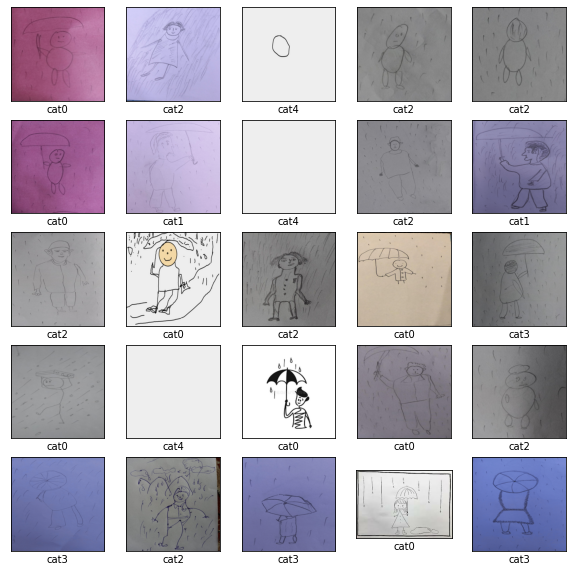

In [4]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [5]:
#model = image_classifier.create(train_data, model_spec='resnet_50', validation_data=test_data, epochs=11)

In [6]:
writer = tf.summary.create_file_writer("./logs_folder/my_logs")
with writer.as_default():
  for step in range(1):
    # other model code would go here
    model=image_classifier.create(train_data, model_spec='resnet_50', validation_data=test_data, epochs=13)
    tf.summary.scalar("my_metric", 0.5, step=step)
    writer.flush()


INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 2048)             23564800  
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 5)                 10245     
                                                                 
Total params: 23,575,045
Trainable params: 10,245
Non-trainable params: 23,564,800
_________________________________________________________________
None
Epoch 1/13


/home/aadil_jamal/.local/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 151s 8s/step - loss: 1.4776 - accuracy: 0.5147 - val_loss: 1.0812 - val_accuracy: 0.7344
Epoch 2/13
17/17 [==============================] - 140s 8s/step - loss: 1.0576 - accuracy: 0.7279 - val_loss: 0.9472 - val_accuracy: 0.7500
Epoch 3/13
17/17 [==============================] - 140s 8s/step - loss: 0.8589 - accuracy: 0.7868 - val_loss: 0.8216 - val_accuracy: 0.8125
Epoch 4/13
17/17 [==============================] - 140s 8s/step - loss: 0.7143 - accuracy: 0.8713 - val_loss: 0.7612 - val_accuracy: 0.8125
Epoch 5/13
17/17 [==============================] - 134s 8s/step - loss: 0.6673 - accuracy: 0.8787 - val_loss: 0.7737 - val_accuracy: 0.8281
Epoch 6/13
17/17 [==============================] - 136s 8s/step - loss: 0.6548 - accuracy: 0.8805 - val_loss: 0.7457 - val_accuracy: 0.8125
Epoch 7/13
17/17 [==============================] - 140s 8s/step - loss: 0.6364 - accuracy: 0.9044 - val_loss: 0.7525 - val_accuracy: 0.8281
Epoch 8/13
17/17 [======

In [7]:
%reload_ext tensorboard



In [8]:
loss, accuracy = model.evaluate(test_data)
    

3/3 [==============================] - 17s 5s/step - loss: 0.7551 - accuracy: 0.8889


In [9]:
%tensorboard --logdir logs_folder/my_logs/

In [10]:
model.export(export_dir='./modelpoints/')


2021-11-22 09:10:39.356211: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmp6rhbb4ej/assets


INFO:tensorflow:Assets written to: /tmp/tmp6rhbb4ej/assets
2021-11-22 09:11:00.269010: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:351] Ignored output_format.
2021-11-22 09:11:00.269057: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:354] Ignored drop_control_dependency.
2021-11-22 09:11:00.271207: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmp6rhbb4ej
2021-11-22 09:11:00.317667: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2021-11-22 09:11:00.317724: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: /tmp/tmp6rhbb4ej
2021-11-22 09:11:00.461650: I tensorflow/cc/saved_model/loader.cc:210] Restoring SavedModel bundle.
2021-11-22 09:11:01.773346: I tensorflow/cc/saved_model/loader.cc:194] Running initialization op on SavedModel bundle at path: /tmp/tmp6rhbb4ej
2021-11-22 09:11:02.253706: I tensorflow/cc/saved_model/loader.cc:283] SavedModel

INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpqc5zsiqc/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpqc5zsiqc/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./modelpoints/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./modelpoints/model.tflite


In [11]:
model.export(export_dir='./modelpoints/', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./modelpoints/labels.txt


INFO:tensorflow:Saving labels in ./modelpoints/labels.txt


In [12]:
model.evaluate_tflite('./modelpoints/model.tflite', test_data)

{'accuracy': 0.8194444444444444}

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 2048)             23564800  
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 5)                 10245     
                                                                 
Total params: 23,575,045
Trainable params: 10,245
Non-trainable params: 23,564,800
_________________________________________________________________


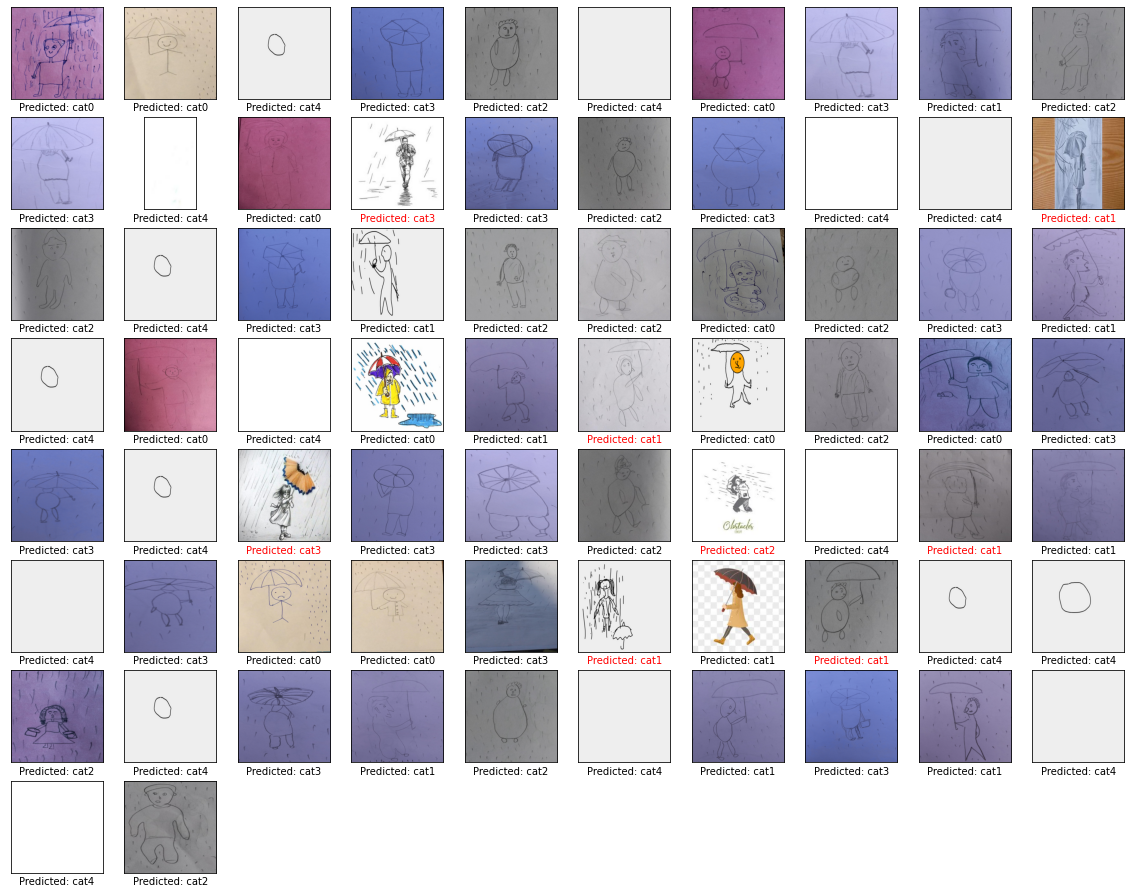

In [14]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()